**Parsing**

In [ ]:
import json

In [ ]:
!wget 'https://rajpurkar.github.io/SQuAD-explorer/dataset/train-v1.1.json'

--2021-02-03 03:46:41--  https://rajpurkar.github.io/SQuAD-explorer/dataset/train-v1.1.json
Resolving rajpurkar.github.io (rajpurkar.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to rajpurkar.github.io (rajpurkar.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30288272 (29M) [application/json]
Saving to: ‘train-v1.1.json’

train-v1.1.json     100%[===================>]  28.88M  --.-KB/s    in 0.1s    

2021-02-03 03:46:41 (277 MB/s) - ‘train-v1.1.json’ saved [30288272/30288272]



In [ ]:
with open('/content/train-v1.1.json') as file:
  new=json.load(file)

In [ ]:
len(new['data'])

442

In [ ]:
new['data'][0]['paragraphs'][0]

{'context': 'Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.',
 'qas': [{'answers': [{'answer_start': 515,
     'text': 'Saint Bernadette Soubirous'}],
   'id': '5733be284776f41900661182',
   'question': 'To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?'},
  {'answers': [{'answer_start': 188, 'text': 'a copper statue of Christ

In [ ]:
new['data'][0]['paragraphs'][0].keys()

dict_keys(['context', 'qas'])

In [ ]:
new['data'][0]['paragraphs'][0]['qas']

[{'answers': [{'answer_start': 515, 'text': 'Saint Bernadette Soubirous'}],
  'id': '5733be284776f41900661182',
  'question': 'To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?'},
 {'answers': [{'answer_start': 188, 'text': 'a copper statue of Christ'}],
  'id': '5733be284776f4190066117f',
  'question': 'What is in front of the Notre Dame Main Building?'},
 {'answers': [{'answer_start': 279, 'text': 'the Main Building'}],
  'id': '5733be284776f41900661180',
  'question': 'The Basilica of the Sacred heart at Notre Dame is beside to which structure?'},
 {'answers': [{'answer_start': 381,
    'text': 'a Marian place of prayer and reflection'}],
  'id': '5733be284776f41900661181',
  'question': 'What is the Grotto at Notre Dame?'},
 {'answers': [{'answer_start': 92,
    'text': 'a golden statue of the Virgin Mary'}],
  'id': '5733be284776f4190066117e',
  'question': 'What sits on top of the Main Building at Notre Dame?'}]

In [ ]:
new['data'][0]['paragraphs'][0]['qas'][0]

{'answers': [{'answer_start': 515, 'text': 'Saint Bernadette Soubirous'}],
 'id': '5733be284776f41900661182',
 'question': 'To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?'}

In [ ]:
new['data'][0]['paragraphs'][0]['qas'][0]['answers'][0]['text']

'Saint Bernadette Soubirous'

In [ ]:
new['data'][0]['paragraphs'][0]['context']

'Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.'

In [ ]:
new.keys()

dict_keys(['data', 'version'])

In [ ]:
new['data'][0].keys()

dict_keys(['title', 'paragraphs'])

In [ ]:
new['data'][0]['title']

'University_of_Notre_Dame'

In [ ]:
new['data'][0]['paragraphs'][0].keys()


dict_keys(['context', 'qas'])

In [ ]:
new['data'][0]['paragraphs'][0]['qas'][0]['answers'][0]['answer_start']


515

In [ ]:
df = pd.DataFrame(columns=['context','question','answer','answer_start']) 
df

,context,question,answer,answer_start


In [ ]:
for data in new['data']:
  for paragraphs in data['paragraphs']:
    context=paragraphs['context']
    for qas in paragraphs['qas']:
      question=qas['question']
      answer=qas['answers'][0]['text']
      answer_start=qas['answers'][0]['answer_start']
      df=df.append({'context':context,'question':question,'answer':answer,'answer_start':answer_start},ignore_index=True)


      



In [ ]:
df

NameError: ignored

In [ ]:
df.to_csv('/content/train-v1.0.csv',index=True)


NameError: ignored

**Start here**

In [ ]:
import pandas as pd

In [ ]:
cp -r '/content/drive/MyDrive/Datas/train-v1.0.csv' '/content/' 

In [ ]:
df=pd.read_csv('/content/train-v1.0.csv')

In [18]:
pip install transformers

     |████████████████████████████████| 1.8MB 4.4MB/s 
     |████████████████████████████████| 3.2MB 15.6MB/s 
     |████████████████████████████████| 890kB 18.4MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=a504791c5d2cc272e7bb20fe152d428bb552e991705d8a11ae1d246dd69f3499
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [19]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

In [ ]:
df['context'].values

array(['Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.',
       'Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the M

In [ ]:

line_length=df['context'].apply(lambda x : len(x.split())).values

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


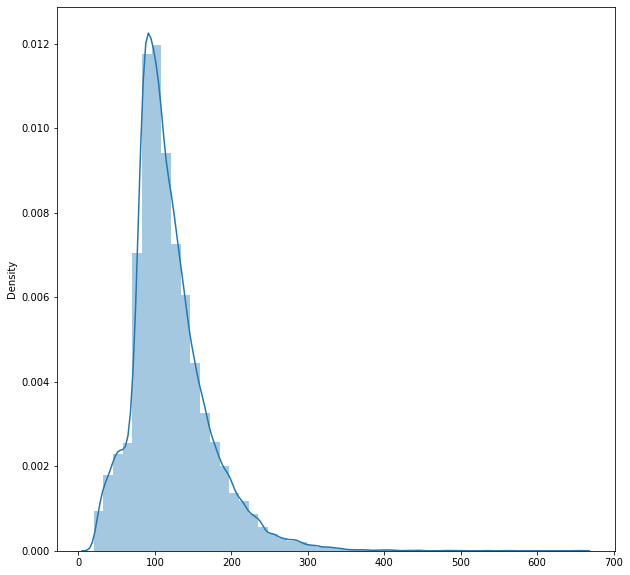

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.distplot(line_length)


In [ ]:

ques_length=df['question'].apply(lambda x : len(x.split())).values

In [ ]:
ques_length

array([13, 10, 14, ...,  9, 10,  6])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


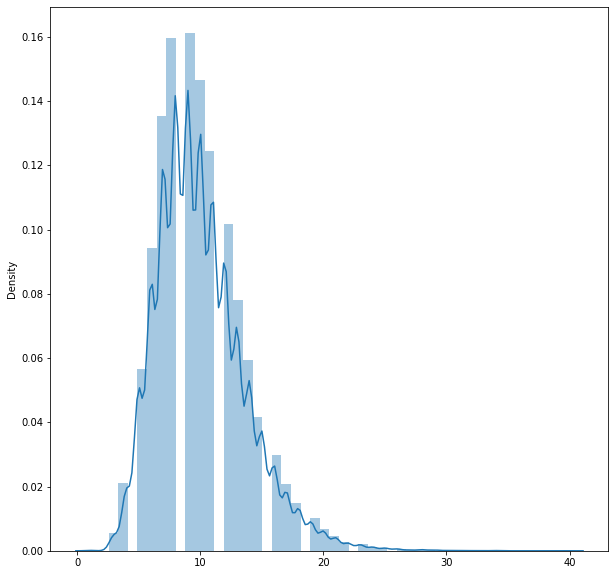

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(ques_length)


In [ ]:
seq_length=400

In [ ]:
df

,Unnamed: 0,context,question,answer,answer_start
0,0,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,Saint Bernadette Soubirous,515
1,1,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,a copper statue of Christ,188
2,2,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,the Main Building,279
3,3,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,a Marian place of prayer and reflection,381
4,4,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,a golden statue of the Virgin Mary,92
...,...,...,...,...,...
87594,87594,"Kathmandu Metropolitan City (KMC), in order to...",In what US state did Kathmandu first establish...,Oregon,229
87595,87595,"Kathmandu Metropolitan City (KMC), in order to...",What was Yangon previously known as?,Rangoon,414
87596,87596,"Kathmandu Metropolitan City (KMC), in order to...",With what Belorussian city does Kathmandu have...,Minsk,476
87597,87597,"Kathmandu Metropolitan City (KMC), in order to...",In what year did Kathmandu create its initial ...,1975,199


In [ ]:
word_count=0
letter_count=0
for word in df['context'][0].split():
  letter_count=letter_count+len(word)+1
  word_count=word_count+1
  if df['answer_start'][0]<letter_count:
    break


In [ ]:
letter_count,word_count

(521, 91)

In [ ]:
df['context'][0].split()[word_count-1:len(df['answer'][0].split())+word_count-1]

['Saint', 'Bernadette', 'Soubirous']

In [ ]:
word_count-1,len(df['answer'][0].split())+word_count-1

(90, 93)

In [ ]:
df

,Unnamed: 0,context,question,answer,answer_start
0,0,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,Saint Bernadette Soubirous,515
1,1,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,a copper statue of Christ,188
2,2,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,the Main Building,279
3,3,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,a Marian place of prayer and reflection,381
4,4,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,a golden statue of the Virgin Mary,92
...,...,...,...,...,...
87594,87594,"Kathmandu Metropolitan City (KMC), in order to...",In what US state did Kathmandu first establish...,Oregon,229
87595,87595,"Kathmandu Metropolitan City (KMC), in order to...",What was Yangon previously known as?,Rangoon,414
87596,87596,"Kathmandu Metropolitan City (KMC), in order to...",With what Belorussian city does Kathmandu have...,Minsk,476
87597,87597,"Kathmandu Metropolitan City (KMC), in order to...",In what year did Kathmandu create its initial ...,1975,199


In [ ]:
df3 = pd.DataFrame(columns=['word_start']) 
df3=pd.DataFrame(columns=['word_end']) 
df3

,word_end


In [ ]:
def count_word(txt,ans,answer_start):
  word_count=0
  letter_count=0
  for word in txt.split():
    ans=str(ans)
    letter_count=letter_count+len(word)+1
    word_count=word_count+1
    if answer_start<letter_count:
      break
      
  return [word_count-1,len(ans.split())+word_count-1]


In [ ]:
count_word(df['context'][0],df['answer'][0],df['answer_start'][0])

[90, 93]

In [ ]:
df[['word_start','word_end']]=df.apply(lambda x :count_word(x['context'],x['answer'],x['answer_start']),axis=1,result_type='expand') 

In [ ]:
df

,Unnamed: 0,context,question,answer,answer_start,word_start,word_end
0,0,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,Saint Bernadette Soubirous,515,90,93
1,1,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,a copper statue of Christ,188,32,37
2,2,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,the Main Building,279,49,52
3,3,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,a Marian place of prayer and reflection,381,66,73
4,4,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,a golden statue of the Virgin Mary,92,14,21
...,...,...,...,...,...,...,...
87594,87594,"Kathmandu Metropolitan City (KMC), in order to...",In what US state did Kathmandu first establish...,Oregon,229,30,31
87595,87595,"Kathmandu Metropolitan City (KMC), in order to...",What was Yangon previously known as?,Rangoon,414,57,58
87596,87596,"Kathmandu Metropolitan City (KMC), in order to...",With what Belorussian city does Kathmandu have...,Minsk,476,67,68
87597,87597,"Kathmandu Metropolitan City (KMC), in order to...",In what year did Kathmandu create its initial ...,1975,199,24,25


In [ ]:
len(df)

87599

In [ ]:

def tk(text):
  tokens = tokenizer.encode_plus(text, max_length = seq_length,
                                truncation = True, padding = "max_length",
                                add_special_tokens= True, return_token_type_ids = False,
                                return_attention_mask = True, return_tensors='tf')
  return tokens


In [ ]:
input=tk(df['question'][0])

In [ ]:
input

{'input_ids': <tf.Tensor: shape=(1, 400), dtype=int32, numpy=
array([[  101,  1706,  2292,  1225,  1103,  6567,  2090,  9273,  2845,
         1107,  8109,  1107, 10111, 20500,  1699,   136,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0, 

In [ ]:
import numpy as np


In [ ]:
mask=np.array(input['attention_mask'])>0

In [ ]:
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
      

In [ ]:
input_ids=np.array(input['input_ids'])

In [ ]:
var1=input_ids[mask]

In [ ]:
var1

array([  101,  1706,  2292,  1225,  1103,  6567,  2090,  9273,  2845,
        1107,  8109,  1107, 10111, 20500,  1699,   136,   102],
      dtype=int32)

In [ ]:
context_input=tk(df['context'][0])
context_mask=np.array(context_input['attention_mask']>0)
context_ids=np.array(context_input['input_ids'])
context_ids[context_mask]

array([  101, 22182,  1193,   117,  1103,  1278,  1144,   170,  2336,
        1959,   119,  1335,  4184,  1103,  4304,  4334,   112,   188,
        2284, 10945,  1110,   170,  5404,  5921,  1104,  1103,  6567,
        2090,   119, 13301,  1107,  1524,  1104,  1103,  4304,  4334,
        1105,  4749,  1122,   117,  1110,   170,  7335,  5921,  1104,
        4028,  1114,  1739,  1146, 14089,  5591,  1114,  1103,  7051,
         107,   159, 21462,  1566, 24930,  2508,   152,  1306,  3965,
         107,   119,  5893,  1106,  1103,  4304,  4334,  1110,  1103,
       19349,  1104,  1103, 11373,  4641,   119, 13301,  1481,  1103,
         171, 17506,  9538,  1110,  1103,   144, 10595,  2430,   117,
         170, 14789,  1282,  1104,  8070,  1105,  9284,   119,  1135,
        1110,   170, 16498,  1104,  1103,   176, 10595,  2430,  1120,
       10111, 20500,   117,  1699,  1187,  1103,  6567,  2090, 25153,
        1193,  1691,  1106,  2216, 17666,  6397,  3786,  1573, 25422,
       13149,  1107,

In [ ]:
var2=context_ids[context_mask][1:]

In [ ]:
var=np.concatenate((var1,var2))
var

array([  101,  1706,  2292,  1225,  1103,  6567,  2090,  9273,  2845,
        1107,  8109,  1107, 10111, 20500,  1699,   136,   102, 22182,
        1193,   117,  1103,  1278,  1144,   170,  2336,  1959,   119,
        1335,  4184,  1103,  4304,  4334,   112,   188,  2284, 10945,
        1110,   170,  5404,  5921,  1104,  1103,  6567,  2090,   119,
       13301,  1107,  1524,  1104,  1103,  4304,  4334,  1105,  4749,
        1122,   117,  1110,   170,  7335,  5921,  1104,  4028,  1114,
        1739,  1146, 14089,  5591,  1114,  1103,  7051,   107,   159,
       21462,  1566, 24930,  2508,   152,  1306,  3965,   107,   119,
        5893,  1106,  1103,  4304,  4334,  1110,  1103, 19349,  1104,
        1103, 11373,  4641,   119, 13301,  1481,  1103,   171, 17506,
        9538,  1110,  1103,   144, 10595,  2430,   117,   170, 14789,
        1282,  1104,  8070,  1105,  9284,   119,  1135,  1110,   170,
       16498,  1104,  1103,   176, 10595,  2430,  1120, 10111, 20500,
         117,  1699,

In [ ]:
len(var)

181

In [ ]:
input_ids_1=np.pad(var,(0,430-len(var)),'constant')

In [ ]:
token_type=np.ones(len(var2))
token_type_ids=np.pad(token_type,(len(var1),430-(len(var1)+len(var2))),'constant')



In [ ]:
token_type_ids

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
attention=np.ones(len(var))
attention_mask=np.pad(attention,(0,430-len(var)),'constant')
attention_mask

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
input=tk(df['question'][0])

In [ ]:
in_ids=[]
type_ids=[]
att_mask=[]
for i in range(len(df)):
  question=tk(df['question'][i])
  mask=np.array(question['attention_mask'])>0
  ques_mask=mask[:30]

  input_ids=np.array(question['input_ids'])
  question_ids=input_ids[:30]
  var1=question_ids[ques_mask]
  
  context_input=tk(df['context'][i])
  context_mask=np.array(context_input['attention_mask']>0)
  context_mask=context_mask[:400]
  
  context_ids=np.array(context_input['input_ids'])
  context_ids=context_ids[:400]
  context_ids[context_mask]
  var2=context_ids[context_mask][1:]
  
  var=np.concatenate((var1,var2))
  #print(len(var))

  in_ids.append(np.pad(var,(0,440-len(var)),'constant'))
  
  token_type=np.ones(len(var2))
  type_ids.append(np.pad(token_type,(len(var1),440-(len(var1)+len(var2))),'constant'))
  
  attention=np.ones(len(var))
  att_mask.append(np.pad(attention,(0,440-len(var)),'constant'))







In [ ]:
input_ids1=np.array(in_ids)
type_ids1=np.array(type_ids)
att_mask1=np.array(att_mask)



In [ ]:
np.save('/content/input_ids1.npy',input_ids1)
np.save('/content/type_ids1.npy',type_ids1)
np.save('/content/att_mask1.npy',att_mask1)

In [1]:
df.to_csv('/content/drive/MyDrive/Datas/dataframe_squad.csv',index=True)

NameError: ignored

In [1]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Datas/dataframe_squad.csv')

In [4]:
!cp  '/content/drive/MyDrive/Datas/input_ids1.npy' '/content/'
!cp '/content/drive/MyDrive/Datas/att_mask1.npy' '/content/'
!cp '/content/drive/MyDrive/Datas/type_ids1.npy' '/content/'

In [2]:
import numpy as np


In [5]:
input_ids1=np.load('/content/input_ids1.npy')
type_ids1=np.load('/content/type_ids1.npy')
att_mask1=np.load('/content/att_mask1.npy')

In [5]:
input_ids1.shape

(87599, 440)

In [6]:
x=[]
x.append(input_ids1)
x.append(type_ids1)
x.append(att_mask1)

In [7]:
start_index=df['word_start'].values
end_index=df['word_end'].values


In [8]:
y=[]
y.append(start_index)
y.append(end_index)

In [7]:
import tensorflow as tf
dataset = tf.data.Dataset.from_tensor_slices((input_ids1,type_ids1,att_mask1,start_index,end_index))

In [ ]:
print(tf.__version__)

2.4.1


In [8]:
def map_func(in_ids,type_ids,att_mask,start_index,end_index):
  return {"input_ids1" : input_ids1, "att_mask1" : att_mask1,"type_ids1" : type_ids1}, {"start_word" : start_index,"end_word" : end_index}

dataset = dataset.map(map_func)

for i in dataset.take(1):
  print(i)

({'input_ids1': <tf.Tensor: shape=(87599, 440), dtype=int32, numpy=
array([[  101,  1706,  2292, ...,     0,     0,     0],
       [  101,  1327,  1110, ...,     0,     0,     0],
       [  101,  1109, 19349, ...,     0,     0,     0],
       ...,
       [  101,  1556,  1184, ...,     0,     0,     0],
       [  101,  1130,  1184, ...,     0,     0,     0],
       [  101,  1327,  1110, ...,     0,     0,     0]], dtype=int32)>, 'att_mask1': <tf.Tensor: shape=(87599, 440), dtype=float64, numpy=
array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])>, 'type_ids1': <tf.Tensor: shape=(87599, 440), dtype=float64, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0.

In [9]:
for element in dataset.as_numpy_iterator():
  print(element)
  break

({'input_ids1': array([[  101,  1706,  2292, ...,     0,     0,     0],
       [  101,  1327,  1110, ...,     0,     0,     0],
       [  101,  1109, 19349, ...,     0,     0,     0],
       ...,
       [  101,  1556,  1184, ...,     0,     0,     0],
       [  101,  1130,  1184, ...,     0,     0,     0],
       [  101,  1327,  1110, ...,     0,     0,     0]], dtype=int32), 'att_mask1': array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]]), 'type_ids1': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])}, {'start_word': 90, 'end_word': 93})


In [10]:
dataset1=dataset.as_numpy_iterator()
dataset1

In [ ]:
new=list(dataset1)

In [ ]:
list(dataset.as_numpy_iterator())

In [10]:
x_train=dataset1.take(round(0.9*87599))

AttributeError: ignored

In [ ]:
x_test=dataset.skip(round(0.9*87599))

In [32]:
pip install transformers

In [33]:
#from transformers import AutoTokenizer

#tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

# Save the slow pretrained tokenizer
import os
from tokenizers import BertWordPieceTokenizer
from transformers import BertTokenizer, TFBertModel, BertConfig
slow_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
save_path = "bert_base_uncased/"
if not os.path.exists(save_path):
    os.makedirs(save_path)
slow_tokenizer.save_pretrained(save_path)

# Load the fast tokenizer from saved file
tokenizer = BertWordPieceTokenizer("bert_base_uncased/vocab.txt", lowercase=True)


In [34]:
from tensorflow import keras
from tensorflow.keras import layers, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Embedding, Dense, Input, GlobalMaxPooling1D,BatchNormalization
import tensorflow as tf


In [35]:
def create_model():
    ## BERT encoder
    encoder = TFBertModel.from_pretrained("bert-base-uncased")
    max_len=384
    ## QA Model
    input_ids = layers.Input(shape=(max_len,), dtype=tf.int32)
    token_type_ids = layers.Input(shape=(max_len,), dtype=tf.int32)
    attention_mask = layers.Input(shape=(max_len,), dtype=tf.int32)
    embedding = encoder(
        input_ids, token_type_ids=token_type_ids, attention_mask=attention_mask
    )[0]

    start_logits = layers.Dense(1, name="start_logit", use_bias=False)(embedding)
    start_logits = layers.Flatten()(start_logits)

    end_logits = layers.Dense(1, name="end_logit", use_bias=False)(embedding)
    end_logits = layers.Flatten()(end_logits)

    start_probs = layers.Activation(keras.activations.softmax)(start_logits)
    end_probs = layers.Activation(keras.activations.softmax)(end_logits)

    model = keras.Model(
        inputs=[input_ids, token_type_ids, attention_mask],
        outputs=[start_probs, end_probs],
    )
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False)
    optimizer = keras.optimizers.Adam(lr=5e-5)
    model.compile(optimizer=optimizer, loss=[loss, loss])
    return model



In [36]:
use_tpu = True
if use_tpu:
    # Create distribution strategy
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)

    # Create model
    with strategy.scope():
      model=create_model()
      
else:
    model = create_model()

model.summary()


INFO:tensorflow:Initializing the TPU system: grpc://10.113.141.2:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.113.141.2:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 384)]        0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            [(None, 384)]        0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 384)]        0                                            
__________________________________________________________________________________________________
tf_bert_model_3 (TFBertModel)   TFBaseModelOutputWit 109482240   input_7[0][0]                    
                                                                 input_9[0][0]              

In [37]:
model.fit(x,y, epochs=10, verbose=1)

Epoch 1/10


ValueError: ignored

In [ ]:
x_train
for i in x_train.take(1):
  print(i)

InvalidArgumentError: ignored

In [ ]:
np.array(x_train)

TypeError: ignored

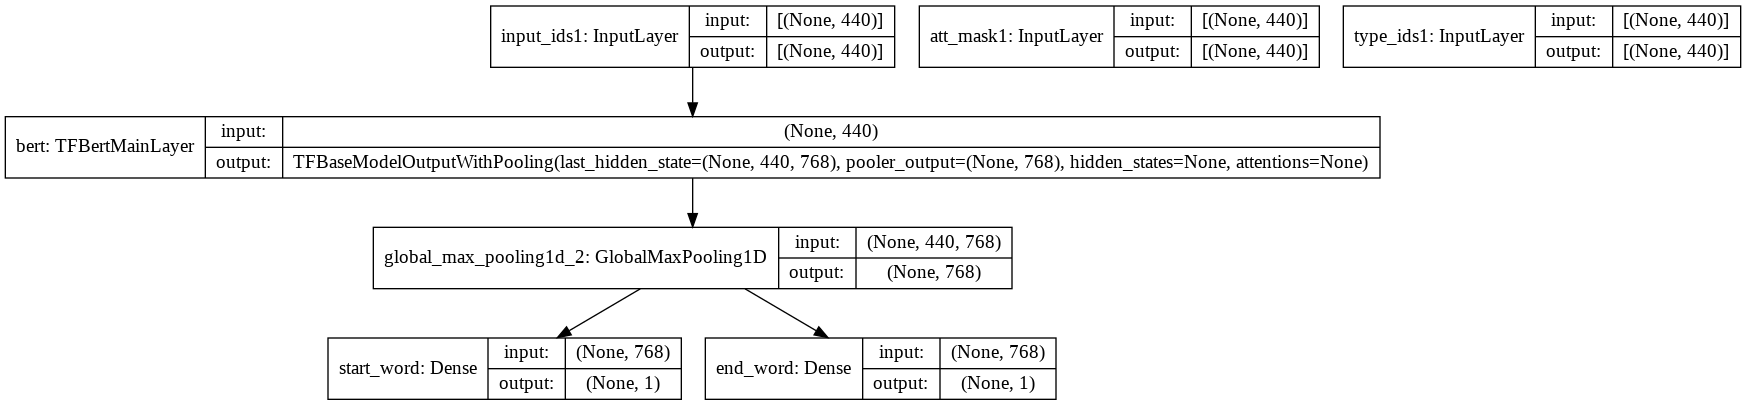

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [28]:
def create_model():
  bert = TFAutoModel.from_pretrained('bert-base-cased')
  seq_length=440
  in_ids=Input(shape=(seq_length),name='input_ids1',dtype='int32')
  type_ids=Input(shape=(seq_length),name='type_ids1',dtype='int32')
  att_mask=Input(shape=(seq_length),name='att_mask1',dtype='int32')
  embeddings=bert.bert(in_ids,att_mask,type_ids)[0]
  #x=GlobalMaxPooling1D()(embeddings)

  start_word=Dense(1,name='start_word',activation='softmax')(embeddings)
  end_word=Dense(1,name='end_word',activation='softmax')(embeddings)
  #start_word=Flatten()(start_word)
  #end_word=Flatten()(end_word)
  model=Model(inputs=[in_ids,att_mask,type_ids],outputs=[start_word,end_word])
  model.layers[3].trainable=False
  loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False)
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=3e-5), loss=[loss, loss], metrics=['acc'])
  return model





IndentationError: ignored